<a href="https://colab.research.google.com/github/naveenjangid027/Yes_bank_stock_price_predication/blob/main/yes_bank_stock_price_prdication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Summary -**

Project Name - Yes Bank Stock Closing Price Prediction
Project Type - Regression
Contribution - Individual
Project Summary -
The objective of this project is to analyze the impact of a fraud case involving Rana Kapoor on the stock prices of Yes Bank, a prominent bank in the Indian financial domain. The dataset used in this project consisted of monthly stock prices of Yes Bank since its inception, including closing, starting, highest, and lowest stock prices.

To predict the stock's closing price, I developed three models namely Ridge_regression, Random Forest and XGBoost Regressor model was developed. The model was trained using the historical stock price data and various features such as mean of Open, High and Low faetures.Additional features were engineered by taking lags to capture the temporal trends and patterns in the data.The performance of the model was evaluated using metrics like RMSE (Root Mean Squared Error),adjustes R2 and R2 score. xGBoost regressor performed well among the three with high R2 score and adjusted R2.

The analysis aimed to uncover any patterns or changes in stock prices related to the fraud case involving Rana Kapoor. The feature importance provided by the XGBoost model helped identify the key factors influencing the stock price.

Overall, the project aimed to contribute to a better understanding of the relationship between the fraud case and Yes Bank's stock prices, and to explore the potential of predictive models in the financial domain. The findings and insights gained from this project can be utilized by investors, analysts, and decision-makers to make informed investment or business decisions related to Yes Bank's stock.

GitHub Link -


Problem Statement
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.

Business Objective.

The ultimate business objective is to leverage the regression model to provide accurate predictions of the closing price of Yes Bank stock, enabling stakeholders to make well-informed investment decisions, manage risks effectively, optimize portfolios, Early warning systems to alert any fraud cases like Rana Kapoor and align investment strategies with financial goals.

Steps involved are:-

1.DATA PREPROCESSING

2.DATA CLEANING

3.DATA DUPLICATION

4.HANDLING OUTLIERS

5.FEATURE TRANSFORMATION

6.EXPLORATORY DATA ANALYSIS

7.ENCODING OF CATEGORICAL COLUMNS

8.ALGORITHMS:-

a.Linear Regression b.Ridge Regression c.Random Forest Regressor d.XGBoost Regressor

General Guidelines : -
1 cell hidden
Let's Begin !
1. Know Your Data
Import Librarie



In [ ]:
# Import Libraries
import numpy as np                                                           #numerical computations
import pandas as pd                                                          #to load the data


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns                                                        # for visualization


from sklearn.preprocessing import (MinMaxScaler,StandardScaler)              #scaling the data
from sklearn.model_selection import train_test_split                        # split train and test data

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import (Lasso, Ridge,ElasticNet, LassoCV, RidgeCV, ElasticNetCV)

import warnings
warnings.filterwarnings('ignore')


Data Loading for this code


In [ ]:
# Load Dataset

#from google.colab import files
#file=files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

In [ ]:
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
dataset

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [ ]:
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


Data set row and column count


In [ ]:
# dataset row and column count
dataset.shape

(185, 5)

In [ ]:
dataset.size

925

Dataset Information

In [ ]:
# Dataset.info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


Duplicate values


In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

Missing Values/Null Values

In [ ]:
#Missing Values/Null Values Count
dataset.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
dataset.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


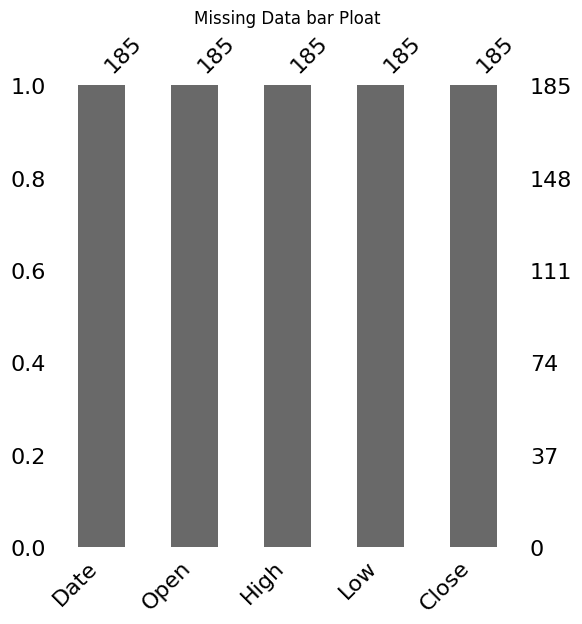

In [ ]:
# Visualizing the missing valus
import missingno as msno
msno.bar(dataset,figsize=(6,6))

plt.title('Missing Data bar Ploat')
plt.show()

2 Understanding Your Variables

In [ ]:
# Dataset Columns
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
dataset.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [ ]:
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


Variable description
Date - Date of the record it has monthly dates from July 2005 to Novemer
open- opening price of the share/stock(Numerical)
High - Highest price of the share for the day (Numerical)
Low - Lowest price of the share for that day(Numerical)
close - closing price of the share for the day (Numerical)


Check Unique Values for each variable


In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print('Unique values in ',i, 'are ' , dataset[i].nunique())

Unique values in  Date are  185
Unique values in  Open are  183
Unique values in  High are  184
Unique values in  Low are  183
Unique values in  Close are  185


3.Data Wrangling


Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# copy to my dataset
dataset_copy = dataset.copy()

In [ ]:
dataset_copy.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
dataset_copy.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
len(dataset_copy[dataset_copy.duplicated()])

0

In [ ]:
dataset_copy.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [ ]:
dataset_copy.describe()

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
mean,2013-03-01 19:04:12.972973056,105.541405,116.104324,94.947838,105.204703
min,2005-07-01 00:00:00,10.000000,11.240000,5.550000,9.980000
25%,2009-05-01 00:00:00,33.800000,36.140000,28.510000,33.450000
50%,2013-03-01 00:00:00,62.980000,72.550000,58.000000,62.540000
75%,2017-01-01 00:00:00,153.000000,169.190000,138.350000,153.300000
max,2020-11-01 00:00:00,369.950000,404.000000,345.500000,367.900000
std,NaN,98.879850,106.333497,91.219415,98.583153


In [ ]:
col=dataset_copy.columns.to_list()
numerical_cols=col[1:]

In [ ]:
numerical_cols

['Open', 'High', 'Low', 'Close']

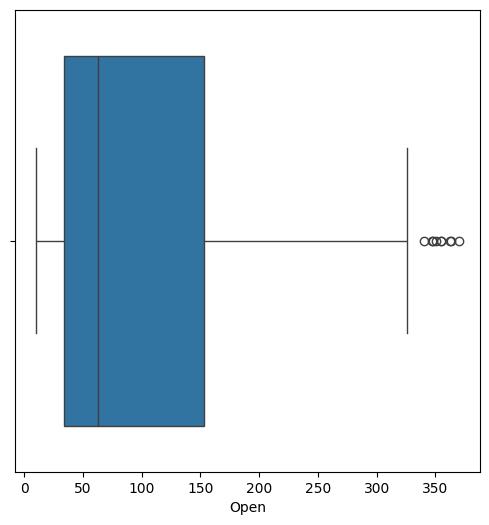

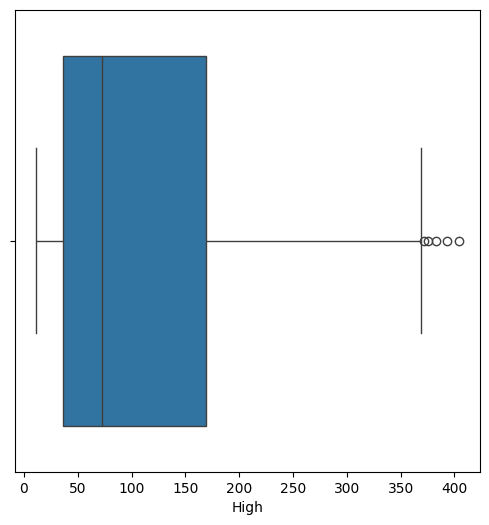

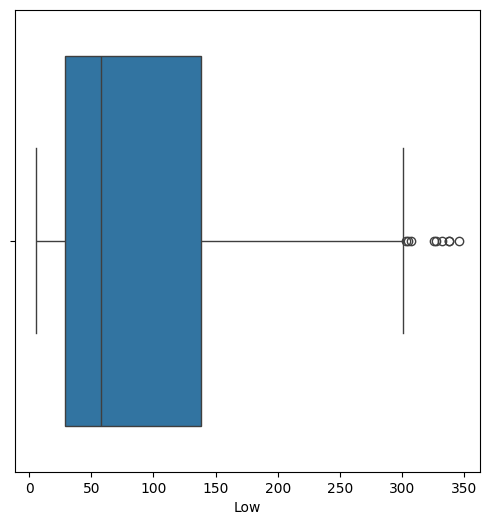

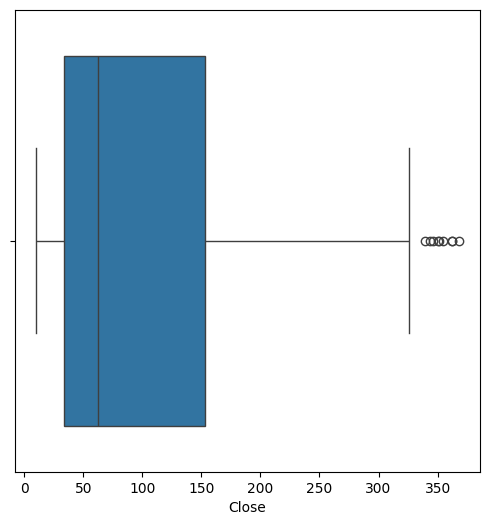

In [ ]:
for column in numerical_cols:
  plt.figure(figsize=(6,6))
  sns.boxplot(dataset_copy[column],orient='h')
  plt.xlabel(column,fontsize=10)
  plt.show()

In [ ]:
# setting the Date as index
dataset_copy.set_index('Date' , inplace=True)

In [ ]:
dataset_copy.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
# seperating the data
independent_variable = dataset_copy.columns.tolist()[:-1]
dependent_variable = ['Close']

print(independent_variable)
print(dependent_variable)

['Open', 'High', 'Low']
['Close']


4. Data Vizualization , Storyelling & Expermenting with charts : Understand the relationship between variable


charts -1

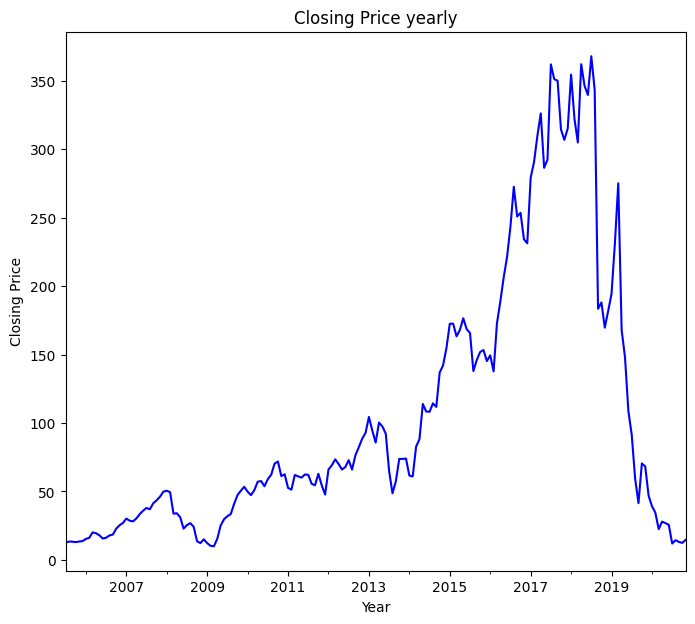

In [ ]:
plt.figure(figsize=(8,7))
dataset_copy['Close'].plot(color = 'b')

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price yearly')
plt.show()

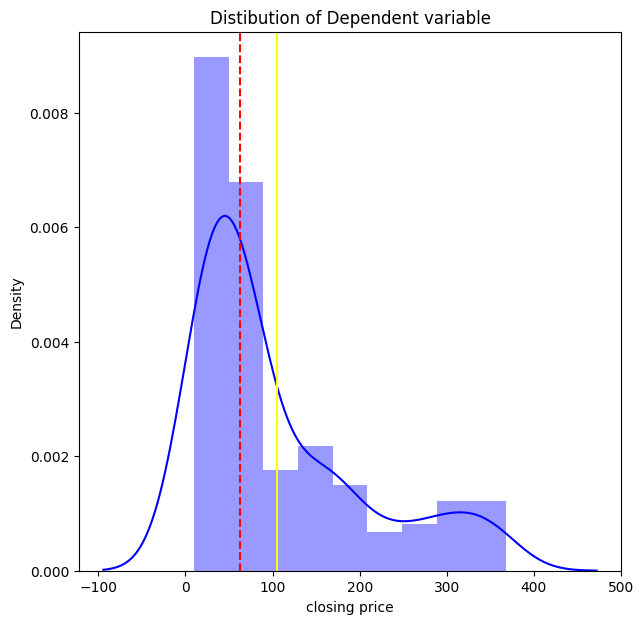

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(dataset_copy['Close'],color="b")
plt.title('Distibution of Dependent variable')
plt.xlabel('closing price')

plt.axvline(dataset_copy['Close'].mean(),color="yellow")
plt.axvline(dataset_copy['Close'].median(),color='red',linestyle='dashed')
plt.show()

Chart-3

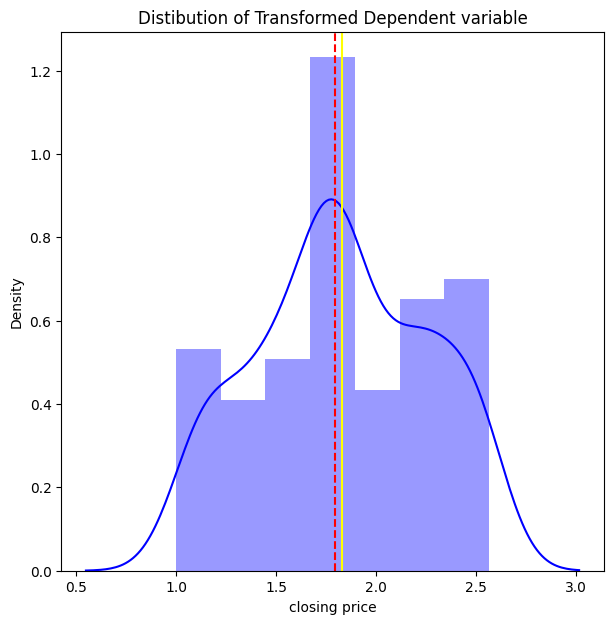

In [ ]:
#applying log transformation
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset_copy['Close']),color="b")
plt.title('Distibution of Transformed Dependent variable')
plt.xlabel('closing price')


plt.axvline(np.log10(dataset_copy['Close']).mean(),color='yellow')
plt.axvline(np.log10(dataset_copy['Close']).median(),color='red',linestyle='dashed')
plt.show()

Chart 4

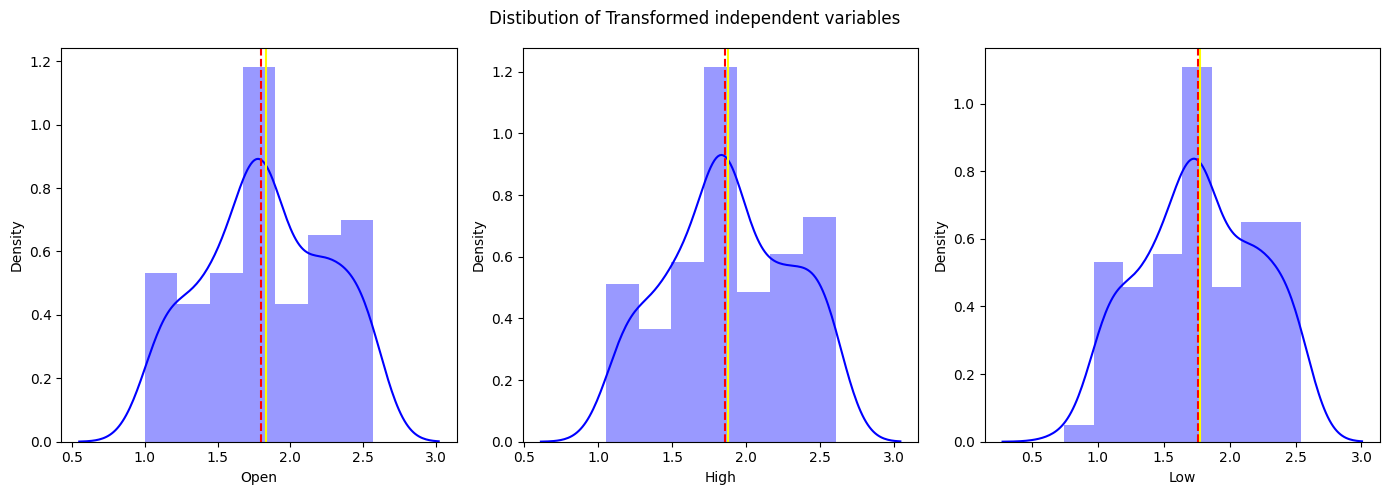

In [ ]:
# Define the list of independent variables
independent_variables = dataset_copy.columns.tolist()[:-1]

# Now run your plotting code
plt.figure(figsize=(14, 5))

for i, col in enumerate(independent_variables):
    plt.subplot(1, 3, i+1)
    sns.distplot(np.log10(dataset_copy[col]), color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(np.log10(dataset_copy[col]).mean(), color='yellow')
    plt.axvline(np.log10(dataset_copy[col]).median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of Transformed independent variables')
plt.tight_layout()
plt.show()

chat 5

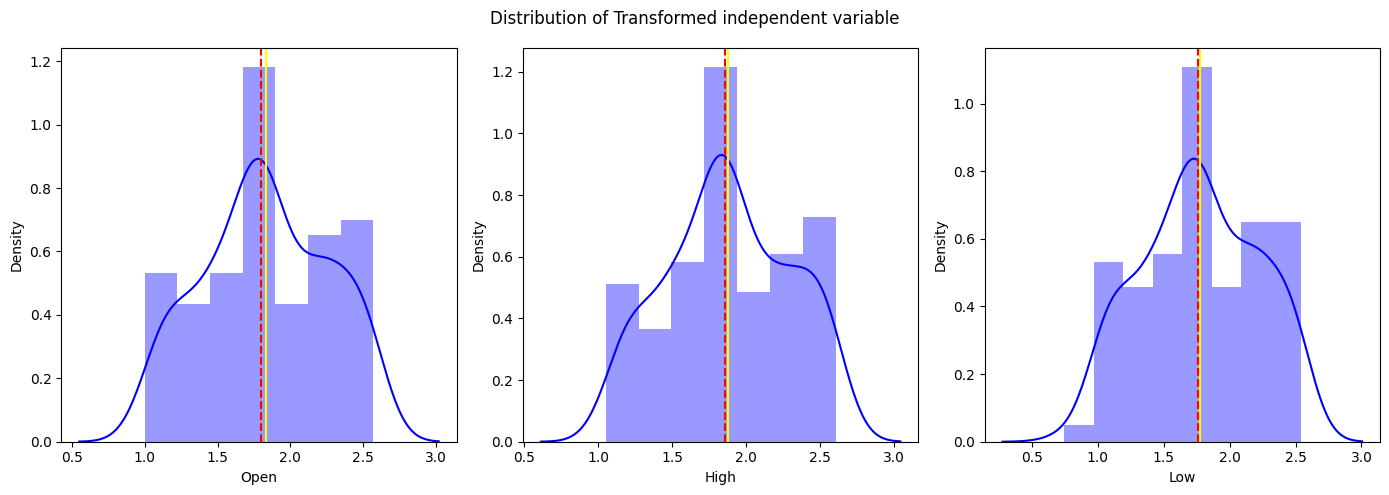

In [ ]:
plt.figure(figsize=(14,5))

for i, col in enumerate(independent_variable):
  plt.subplot(1, 3, i+1)
  sns.distplot(np.log10(dataset_copy[col]), color='b')
  plt.xlabel(col, fontsize=10)

  # Plotting the mean and the median
  plt.axvline(np.log10(dataset_copy[col]).mean(), color="yellow")
  plt.axvline(np.log10(dataset_copy[col]).median(), color='red',linestyle='dashed')

plt.suptitle('Distribution of Transformed independent variable')
plt.tight_layout()
plt.show()

chart - 6

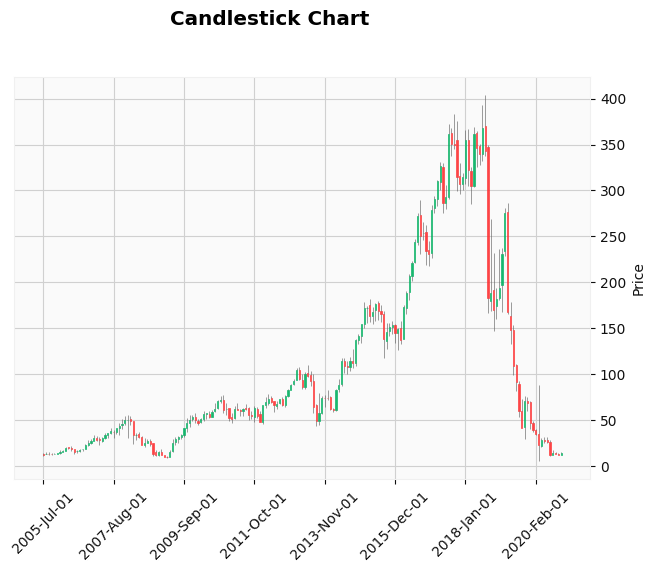

In [ ]:
!pip install mplfinance

import mplfinance as mpf

df_candle = dataset_copy[['Open','High','Low','Close']]
mpf.plot(df_candle, type='candle', style='yahoo' ,title = 'Candlestick Chart')


Chart - 7

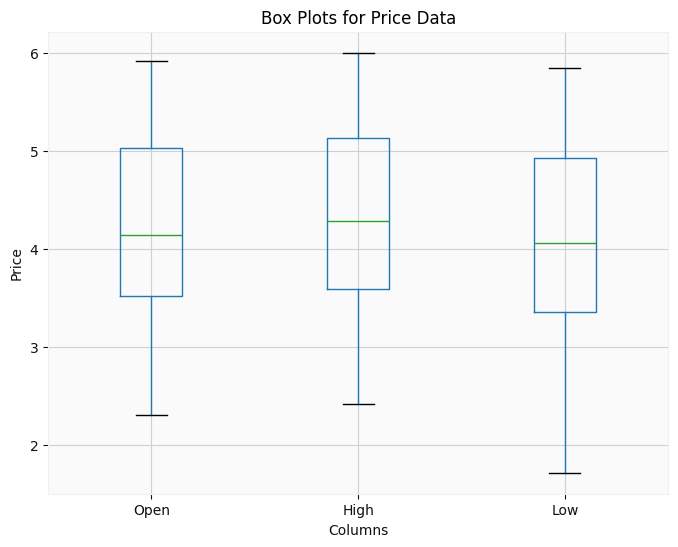

In [ ]:
df_price = np.log(dataset_copy[['Open', 'High', 'Low']])

plt.figure(figsize=(8, 6))
df_price.boxplot()
plt.xlabel('Columns')
plt.ylabel('Price')
plt.title('Box Plots for Price Data')
plt.show()

chart - 8

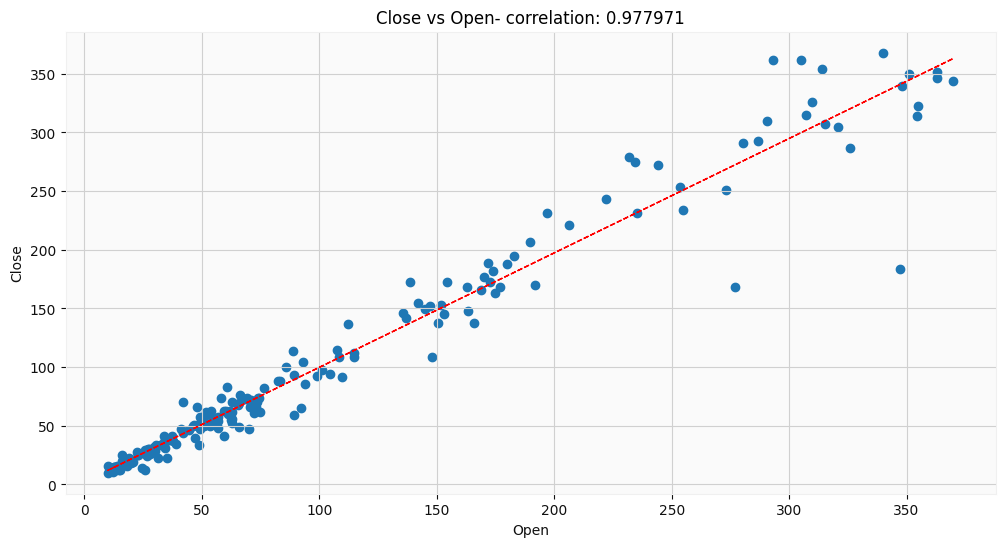

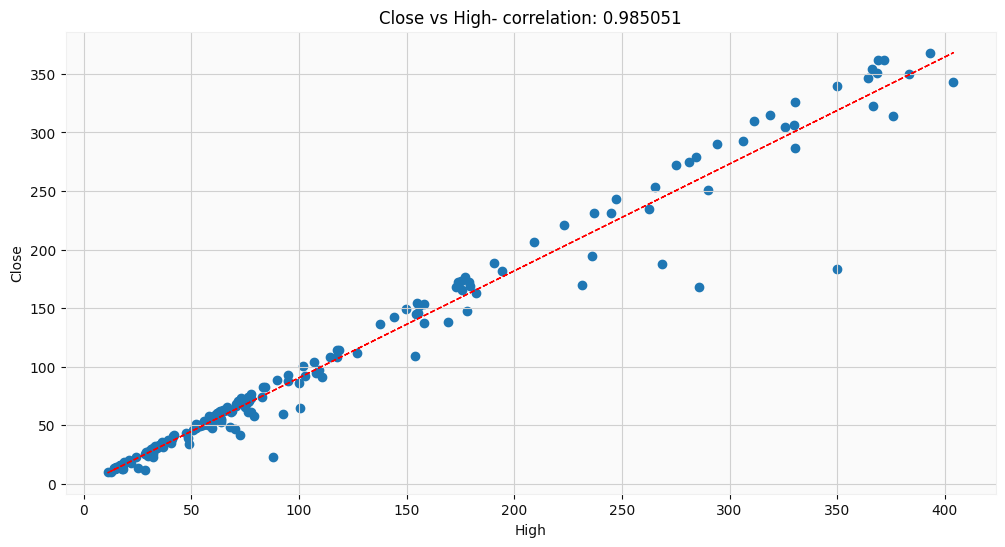

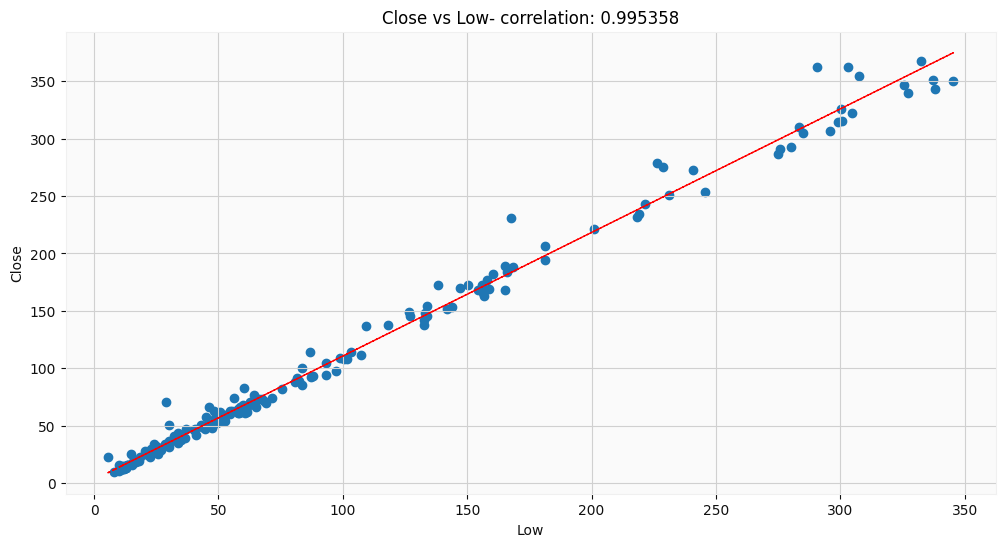

In [ ]:
# Plotting the independent variables against dependent variable and checking the correlation between them.
for col in independent_variables:

  fig = plt.figure(figsize=(12, 6))
  ax = fig.gca()
  feature = dataset_copy[col]
  label = dataset_copy['Close']
  correlation = feature.corr(label)        # calculating the correlation between dependent variable and independent features.
  plt.scatter(x=feature, y=label)          # plotting dependent variables against independent features.


  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' + col + '- correlation: ' + str(round((correlation),6)))

  z = np.polyfit(dataset_copy[col], dataset_copy['Close'], 1)
  y_ = np.poly1d(z)(dataset_copy[col])

  plt.plot(dataset_copy[col], y_, "r--", lw=1)

plt.show()


Chart - 9


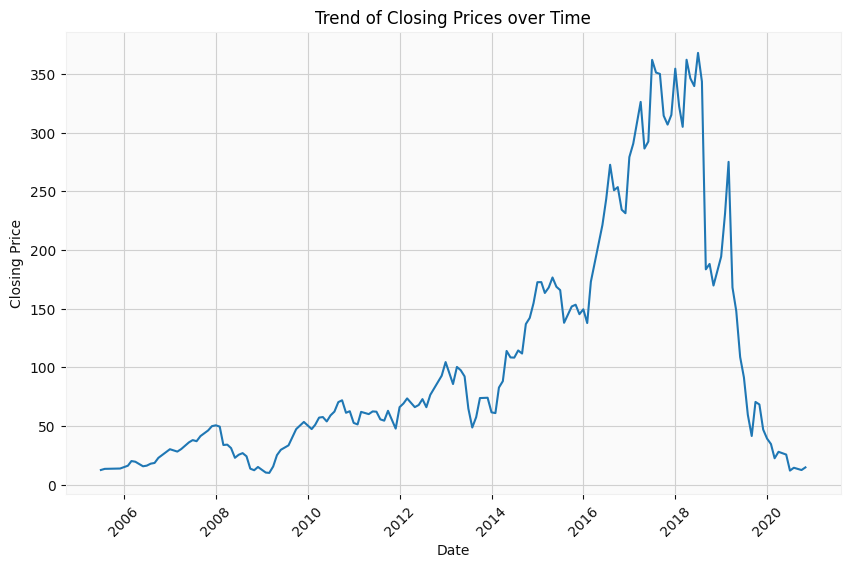

In [ ]:


# Extract the date and closing price columns from the dataset
dates = dataset_copy.index
closing_prices = dataset_copy['Close']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(dates, closing_prices)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Trend of Closing Prices over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

chart-10

<Axes: >

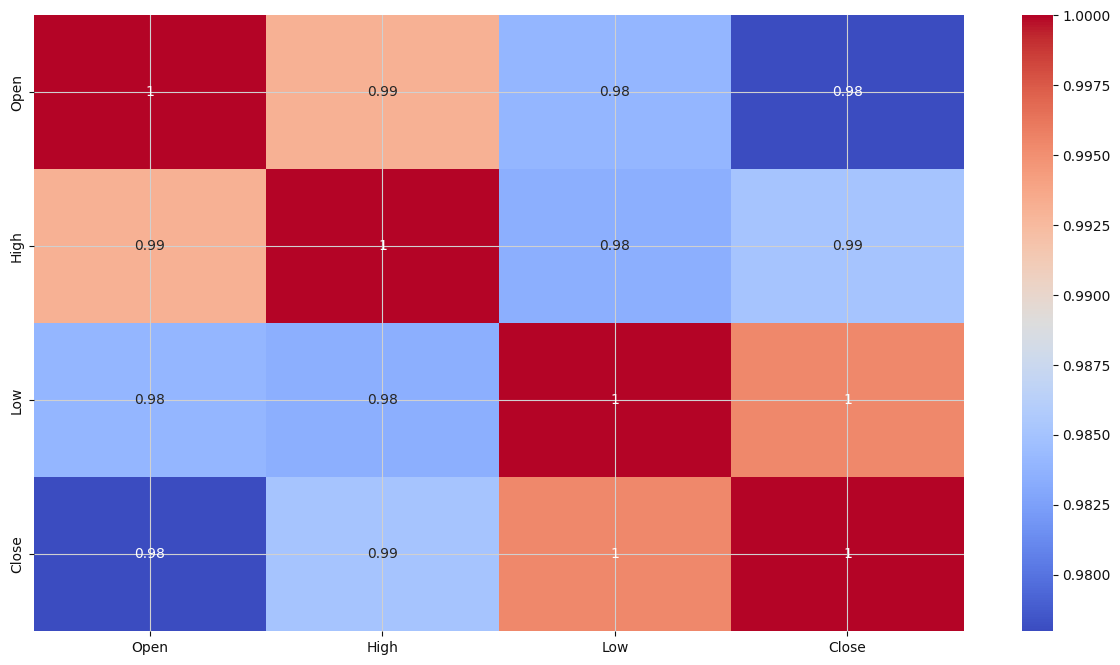

In [ ]:
# Correlation Heatmap visualization code

plt.figure(figsize=(15,8))
correlation = dataset_copy.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Chat - 11 -pair plot

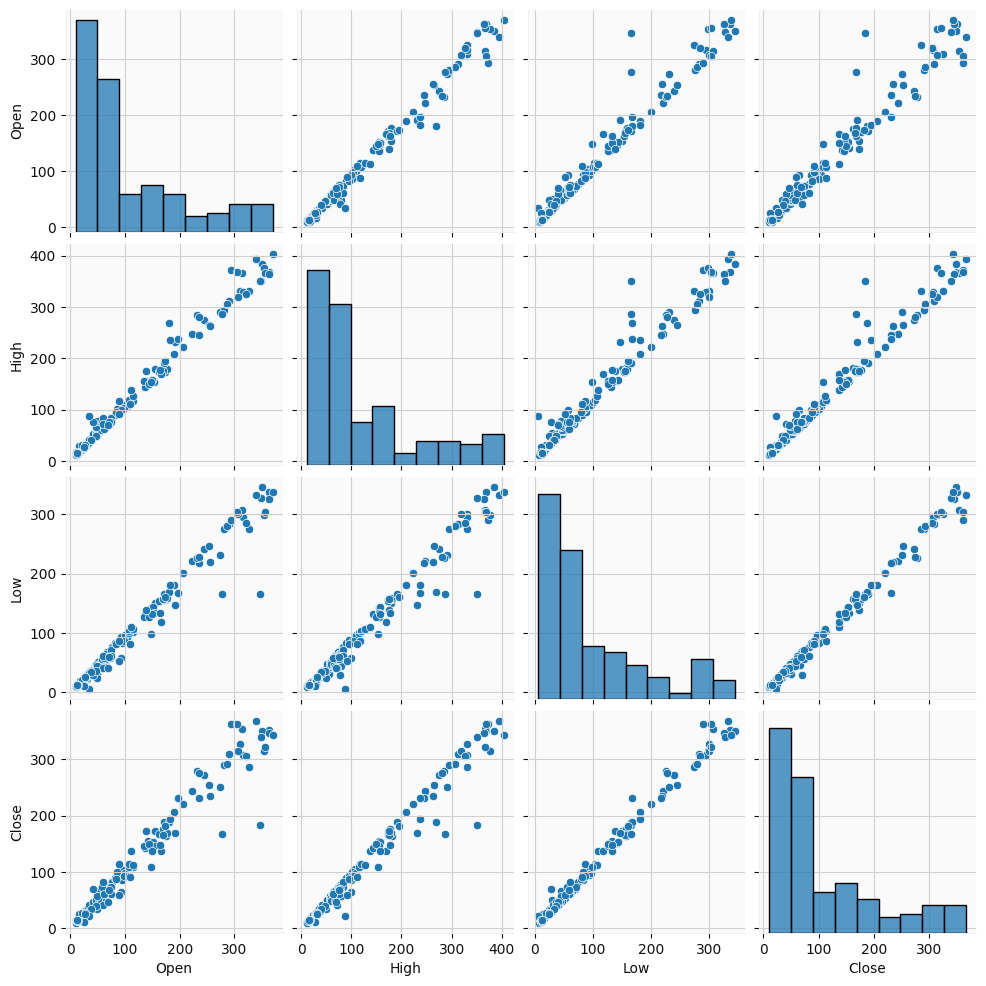

In [ ]:
# Pair Plot Visualization code
sns.pairplot(dataset_copy)

In [ ]:
dataset_copy

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15


In [ ]:
ds1=dataset_copy.copy()

5. Hypothesis Testing

2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import numpy as np
from scipy import stats

# Divide the dataset into two halves: first half and second half
first_half = ds1['Close'][ds1.index.year <= 2017]
second_half = ds1['Close'][ds1.index.year >= 2018]

# Calculate the means and standard deviations of the two halves
mean1 = np.mean(first_half)
mean2 = np.mean(second_half)
std1 = np.std(first_half)
std2 = np.std(second_half)

# Calculate the sample sizes
n1 = len(first_half)
n2 = len(second_half)

# Calculate the standard error of the difference between means
standard_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate the z-score
z = (mean1 - mean2) / standard_error

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")


Reject the null hypothesis. There is a significant difference in means.


Hypothetical Statement - 2

2 Perform an appropriate statistical test

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy import stats

# Calculate the mean opening and closing prices for each month
ds1['Month'] = ds1.index.strftime('%Y-%m')
monthly_data = ds1.groupby('Month').agg({'Open': 'mean', 'Close': 'mean'})

# Define the threshold for high and low opening prices
threshold = monthly_data['Open'].median()

# Divide the data into groups based on opening prices
high_opening_prices = monthly_data[monthly_data['Open'] > threshold]['Close']
low_opening_prices = monthly_data[monthly_data['Open'] <= threshold]['Close']

# Calculate the sample statistics
mean_high = np.mean(high_opening_prices)
mean_low = np.mean(low_opening_prices)
std_high = np.std(high_opening_prices)
std_low = np.std(low_opening_prices)
n_high = len(high_opening_prices)
n_low = len(low_opening_prices)

# Calculate the z-statistic
z_statistic = (mean_high - mean_low) / np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))

# Calculate the p-value
p_value = 1 - stats.norm.cdf(z_statistic)

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")




Reject the null hypothesis. There is a significant difference in the mean closing prices.


In [ ]:
from scipy import stats

# Divide the data into groups based on opening prices
high_opening_prices = ds1[ds1['Open'] > threshold]['Close']
low_opening_prices = ds1[ds1['Open'] <= threshold]['Close']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(high_opening_prices, low_opening_prices)

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")


Reject the null hypothesis. There is a significant difference in the mean closing prices.


6. Feature Engineering & Data Pre-processing


1. Handling Missing Values

In [ ]:
# There are no missing values in the dataset
dataset_copy.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0


2. Handling Outliers

In [ ]:
#Transform has taken care of outliers , so no need  to treet outlieser

3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# There are no categorical variable in this datast.


4. Feature Manipulation & Selection

1.Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# As all the independent variables are highly correlated, I can create a new feature by takinig mean from the each record of independent variables. This will avoid MultiCollinearity and also overfitting of the model.


dataset_copy['Mean_OHL'] = dataset_copy[['Open', 'High', 'Low']].mean(axis=1)
dataset_copy.head()



,Open,High,Low,Close,Mean_OHL
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.750000
2005-08-01,12.58,14.88,12.55,13.42,13.336667
2005-09-01,13.48,14.87,12.27,13.30,13.540000
2005-10-01,13.20,14.47,12.40,12.99,13.356667
2005-11-01,13.35,13.88,12.88,13.41,13.370000


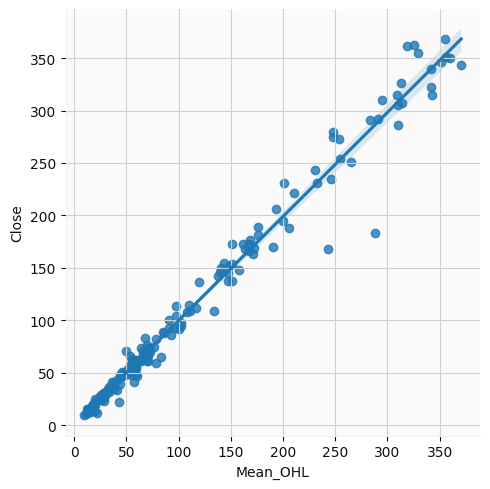

In [ ]:
#checking for linear relationship b/w dependent variable and Independent variable

sns.lmplot(x='Mean_OHL', y='Close', fit_reg=True, data=dataset_copy)

<Axes: xlabel='Mean_OHL', ylabel='Density'>

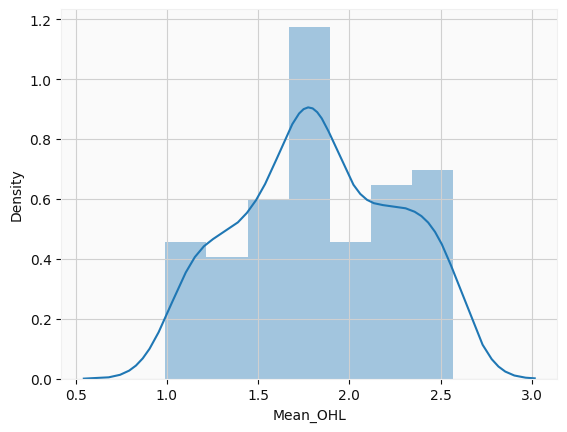

In [ ]:
x=np.log10(dataset_copy['Mean_OHL'])
sns.distplot(x)

In [ ]:
# use lags as additional features
for i in range(1, 13):
    dataset_copy["lag_{}".format(i)] = dataset_copy.Mean_OHL.shift(i)

In [ ]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor


#def calc_vif2(X):

    # Calculating VIF
    #vif = pd.DataFrame()
    #vif["variables"] = X.columns
    #vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    #return(vif)

#calc_vif2(dataset_copy[[i for i in dataset_copy.describe().columns if i not in ['Close']]])

In [ ]:
dataset_copy.head()

,Open,High,Low,Close,Mean_OHL,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Date,,,,,,,,,,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-08-01,12.58,14.88,12.55,13.42,13.336667,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-01,13.48,14.87,12.27,13.30,13.540000,13.336667,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-01,13.20,14.47,12.40,12.99,13.356667,13.540000,13.336667,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-11-01,13.35,13.88,12.88,13.41,13.370000,13.356667,13.540000,13.336667,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2 . Feature Selection

In [ ]:
#independent_variables1=['Open','Price_Range']
#independent_variables1
y_depend = dataset_copy.dropna().Close.values
x_independ = dataset_copy.dropna().drop(['Close','Open','High','Low'], axis=1)



In [ ]:
dependent_variable

['Close']

5. Data Transformation

In [ ]:
x_independ.head()

,Mean_OHL,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Date,,,,,,,,,,,,,
2006-07-01,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000,13.356667,13.540000,13.336667,12.750000
2006-08-01,16.733333,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000,13.356667,13.540000,13.336667
2006-09-01,17.893333,16.733333,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000,13.356667,13.540000
2006-10-01,20.493333,17.893333,16.733333,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000,13.356667
2006-11-01,24.223333,20.493333,17.893333,16.733333,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000


In [ ]:
# Transform Your data

x_independ['Mean_OHL'] = np.log10(x_independ['Mean_OHL'])

# Create the dependent variable data
Y = np.log10(y_depend)

x_independ.values



array([[ 1.19516137, 16.66666667, 19.13333333, ..., 13.54      ,
        13.33666667, 12.75      ],
       [ 1.22358246, 15.67333333, 16.66666667, ..., 13.35666667,
        13.54      , 13.33666667],
       [ 1.25269125, 16.73333333, 15.67333333, ..., 13.37      ,
        13.35666667, 13.54      ],
       ...,
       [ 1.15014216, 13.67      , 21.66666667, ..., 68.76666667,
        49.23333333, 57.66666667],
       [ 1.11859537, 14.13      , 13.67      , ..., 60.4       ,
        68.76666667, 49.23333333],
       [ 1.11969568, 13.14      , 14.13      , ..., 43.98333333,
        60.4       , 68.76666667]])

In [ ]:
#without transformation
#X_not =

# Create the dependent variable data
#Y_not = np.log10(y_depend)


6 . Data Scaling


In [ ]:
# Scaling your data

#after train_test_split
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_independ.values)





In [ ]:
#without transformation
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)



```
# This is formatted as code
```



7. Dimesionality Reduction

8. Data Splitting

In [94]:
# Split your data to train and test. Choose Splitting ratio wisely.

#splitting the data into a train and a test set. we do this using train test split.

x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.2, random_state = 1)
print(x_train.shape)
print(x_test.shape)

(138, 13)
(35, 13)


In [ ]:
#without transformation
#X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 0)
#print(X_train.shape)
#print(X_test.shape)

9. Handling imbalanced Dataset

Do you think the dataset is imbalanced? Explain Why


7. ML Model Implementation

In [104]:
# ML Model - 1 Implementation

# Fit the Algorithm
reg_with_transformation = LinearRegression().fit(x_train, y_train)




In [107]:

# Predicting our test data.
y_train_pred_with_transformation= reg_with_transformation.predict(x_train)
y_test_pred_with_transformation = reg_with_transformation.predict(x_test)
#y_test_pred_without_transformation = reg_without_transformation.predict(X_test)


In [108]:
reg_with_transformation.score(x_train,y_train)


0.9843542232370774

In [109]:
comparision_trans = pd.DataFrame(zip(10**(y_test), 10**(y_test_pred_with_transformation)), columns = ['actual', 'pred'])
comparision_trans.head()

,actual,pred
0,88.14,87.713037
1,149.38,142.253914
2,49.42,50.536952
3,70.07,73.128303
4,62.54,61.988609


In [110]:
train_MAE = mean_absolute_error(10**(y_train),(10**y_train_pred_with_transformation))
print(f"Mean Absolute Error : {train_MAE}")


train_MSE  = mean_squared_error(10**(y_train), 10**(y_train_pred_with_transformation))
print("MSE :" , train_MSE)

train_RMSE = np.sqrt(train_MSE)
print("RMSE :" ,train_RMSE)

train_r2 = r2_score(10**(y_train), 10**(y_train_pred_with_transformation))
print("R2 :" ,train_r2)

train_adjusted_r2=1-(1-r2_score(10**(y_train), 10**(y_train_pred_with_transformation)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2)

print('\n')


MAE = mean_absolute_error(10**(y_test),(10**y_test_pred_with_transformation))
print(f"Mean Absolute Error : {MAE}")

MSE  = mean_squared_error(10**(y_test), 10**(y_test_pred_with_transformation))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_test_pred_with_transformation))
print("R2 :" ,r2)

adjusted_r2=1-(1-r2_score(10**(y_test), 10**(y_test_pred_with_transformation)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2)








Mean Absolute Error : 7.9796697876427505
MSE : 165.74457190566207
RMSE : 12.874182378142002
R2 : 0.9842311259574534
Adjusted R2: 0.9825779375497671


Mean Absolute Error : 7.6296835736156705
MSE : 247.3983988590329
RMSE : 15.72890329485921
R2 : 0.9627196081420266
Adjusted R2: 0.939641270325186


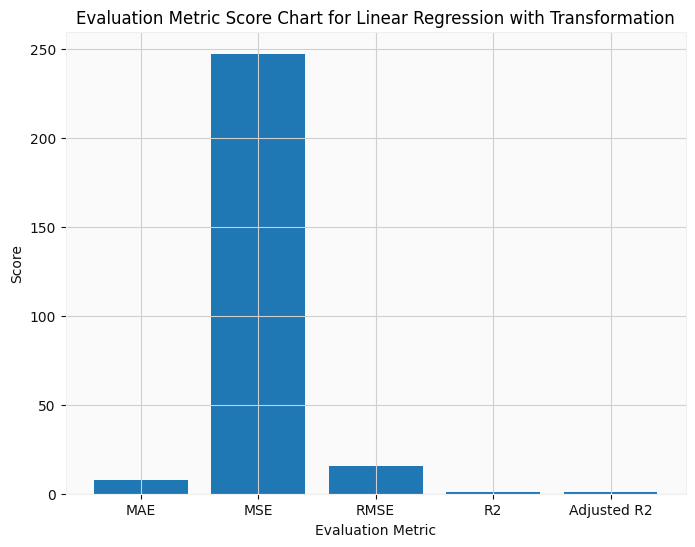

In [111]:
# Visualizing evaluation Metric Score chart
metrics = ['MAE','MSE', 'RMSE', 'R2', 'Adjusted R2']
scores = [MAE,MSE,RMSE,r2,adjusted_r2]

# Plot the evaluation metric score chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart for Linear Regression with Transformation')
plt.show()

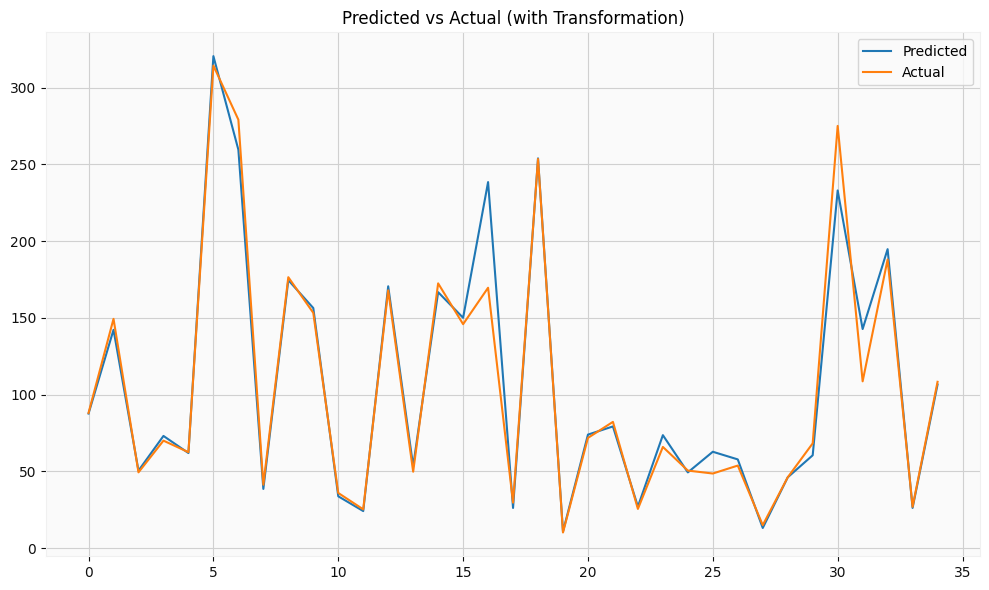

In [112]:
#visualizing actual and predicted data


fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))

# Plot with transformation
ax1.plot(10 ** (y_test_pred_with_transformation))
ax1.plot(np.array(10 ** (y_test)))
ax1.legend(["Predicted", "Actual"])
ax1.set_title("Predicted vs Actual (with Transformation)")


plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Residual Analysis')

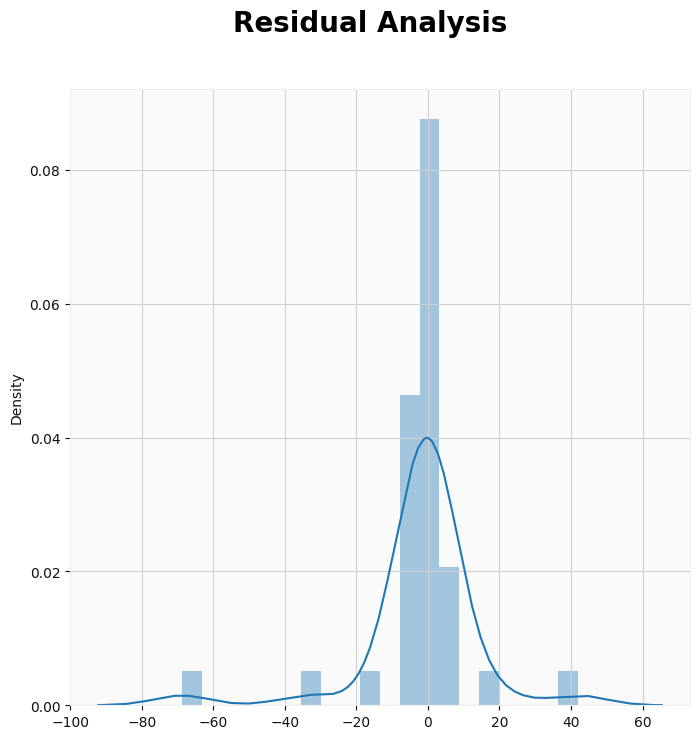

In [113]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_test_pred_with_transformation)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

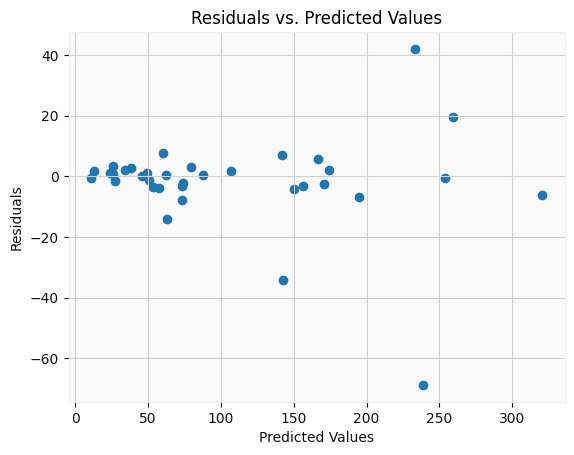

In [114]:
residuals = 10**(y_test)-10**(y_test_pred_with_transformation)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_test_pred_with_transformation),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [115]:
linear_regessor_list = {'Train Mean Absolute Error':train_MAE,'Train Mean squared Error' : train_MSE,'Train Root Mean squared Error' : train_RMSE,'Train R2 score' : train_r2,'Train Adjusted R2 score' : train_adjusted_r2,'Mean Absolute Error':MAE,'Mean squared Error' : MSE,'Root Mean squared Error' : RMSE,'R2 score' : r2,'Adjusted R2 score' : adjusted_r2 }
metrics = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()
metrics = metrics.rename(columns={'index':'Metric',0:'reg_with_transformation'})
metrics


,Metric,reg_with_transformation
0,Train Mean Absolute Error,7.979670
1,Train Mean squared Error,165.744572
2,Train Root Mean squared Error,12.874182
3,Train R2 score,0.984231
4,Train Adjusted R2 score,0.982578
5,Mean Absolute Error,7.629684
6,Mean squared Error,247.398399
7,Root Mean squared Error,15.728903
8,R2 score,0.962720
9,Adjusted R2 score,0.939641


2. Cross- Validation & Hyperparameter Tuning

In [116]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameter = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],

    'positive': [True, False]
}

# Create the grid search object
Lr_gs=GridSearchCV(reg_with_transformation,param_grid=parameter,cv=5,scoring='r2')

# Fit the Algorithm
Lr_gs.fit(x_train,y_train)

# Predict on the model
y_pred_test_gs=Lr_gs.predict(x_test)
y_pred_train_gs=Lr_gs.predict(x_train)



In [117]:

# Metric Score for train set
train_MAE_gs = mean_absolute_error(10**(y_train),(10**y_pred_train_gs))
print(f"Mean Absolute Error : {train_MAE_gs}")


train_MSE_gs  = mean_squared_error(10**(y_train), 10**(y_pred_train_gs))
print("MSE :" , train_MSE_gs)

train_RMSE_gs = np.sqrt(train_MSE_gs)
print("RMSE :" ,train_RMSE_gs)

train_r2_gs = r2_score(10**(y_train), 10**(y_pred_train_gs))
print("R2 :" ,train_r2_gs)

train_adjusted_r2_gs=1-(1-r2_score(10**(y_train), 10**(y_pred_train_gs)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_gs)

print('\n')

# Metric Score for test set
MAE_gs = mean_absolute_error(10**(y_test),(10**y_pred_test_gs))
print(f"Mean Absolute Error : {MAE_gs}")

MSE_gs  = mean_squared_error(10**(y_test), 10**(y_pred_test_gs))
print("MSE :" , MSE_gs)

RMSE_gs = np.sqrt(MSE_gs)
print("RMSE :" ,RMSE_gs)

r2_gs = r2_score(10**(y_test), 10**(y_pred_test_gs))
print("R2 :" ,r2_gs)

adjusted_r2_gs=1-(1-r2_score(10**(y_test), 10**(y_pred_test_gs)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_gs)

Mean Absolute Error : 8.18581124874956
MSE : 222.49884509562514
RMSE : 14.916395177643462
R2 : 0.9788315465020359
Adjusted R2: 0.9766122731514428


Mean Absolute Error : 7.1843580514774175
MSE : 128.38645130515224
RMSE : 11.330774523621598
R2 : 0.9806534834664071
Adjusted R2: 0.968677068469421


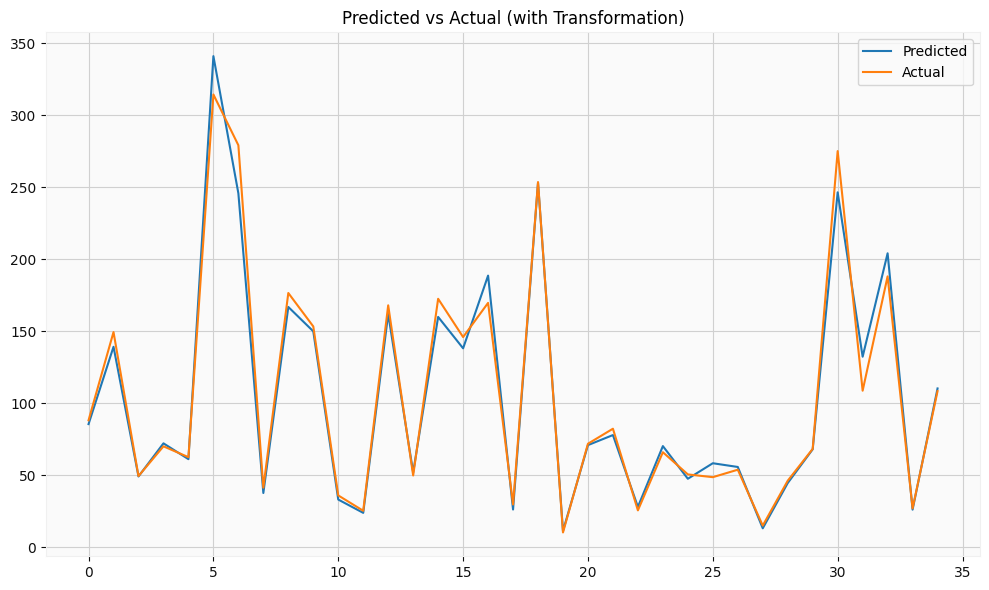

In [118]:
plt.figure(figsize=(10, 6))

# Plot with transformation
plt.plot(10 ** (y_pred_test_gs))
plt.plot(np.array(10 ** (y_test)))
plt.legend(["Predicted", "Actual"])
plt.title("Predicted vs Actual (with Transformation)")

plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Residual Analysis')

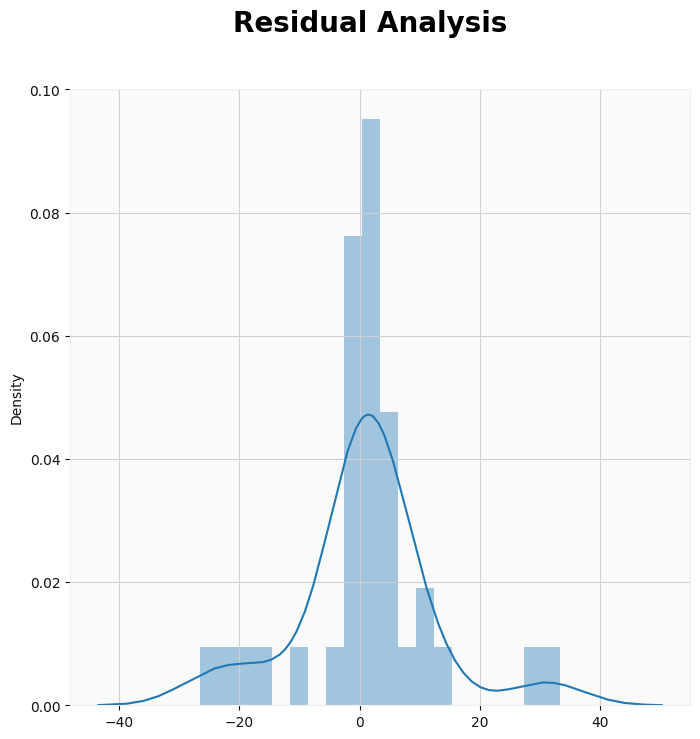

In [ ]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_pred_test_gs)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

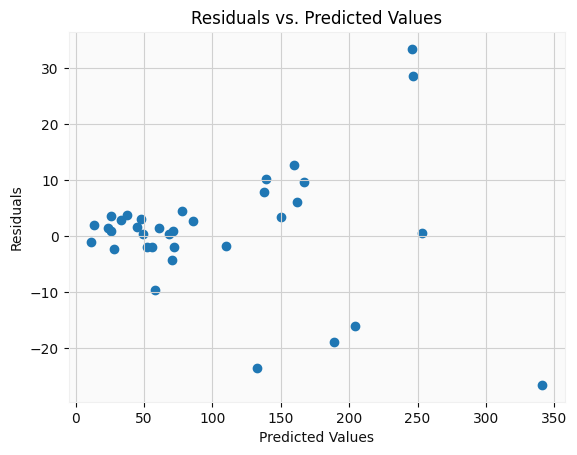

In [119]:
#Homoscadasticity
residuals = 10**(y_test)-10**(y_pred_test_gs)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_pred_test_gs),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [120]:
np.mean(residuals)

np.float64(0.8712340760105953)

In [121]:
metrics['Lr_gs'] = [train_MAE_gs, train_MSE_gs, train_RMSE_gs, train_r2_gs, train_adjusted_r2_gs,MAE_gs,MSE_gs,RMSE_gs,r2_gs,adjusted_r2_gs]


In [122]:
metrics

,Metric,reg_with_transformation,Lr_gs
0,Train Mean Absolute Error,7.979670,8.185811
1,Train Mean squared Error,165.744572,222.498845
2,Train Root Mean squared Error,12.874182,14.916395
3,Train R2 score,0.984231,0.978832
4,Train Adjusted R2 score,0.982578,0.976612
5,Mean Absolute Error,7.629684,7.184358
6,Mean squared Error,247.398399,128.386451
7,Root Mean squared Error,15.728903,11.330775
8,R2 score,0.962720,0.980653
9,Adjusted R2 score,0.939641,0.968677


Ridge with cross Validation and Hyper parameter tuning

In [123]:
#Ridge Regularization
ridge = Ridge()
parameters2 = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,75,80,100]}
ridge_regressor = GridSearchCV(ridge, parameters2, scoring='r2', cv=10)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   75, 80, 100]},
             scoring='r2')

In [124]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " r2 score is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  r2 score is:  0.9760390512790227


In [125]:
print(ridge_regressor)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   75, 80, 100]},
             scoring='r2')


In [126]:
best_ridge_model1 = ridge_regressor.best_estimator_

print(best_ridge_model1.coef_)
print(best_ridge_model1.intercept_)

[ 0.39515104 -0.01483846  0.00717508  0.0200902  -0.01428747 -0.00189978
  0.06516592 -0.01046888 -0.05517151  0.03438031  0.04428562 -0.05331164
 -0.02728311]
1.8740878481194465


In [127]:
y_train_pred_ridge = ridge_regressor.predict(x_train)
y_test_pred_ridge = ridge_regressor.predict(x_test)


In [128]:
ridge_regressor.score(x_train,y_train)

0.9835228344455276

In [129]:

# Metric Score for train set
train_MAE_ridge = mean_absolute_error(10**(y_train),(10**y_train_pred_ridge))
print(f"Mean Absolute Error : {train_MAE_ridge}")


train_MSE_ridge  = mean_squared_error(10**(y_train), 10**(y_train_pred_ridge))
print("MSE :" , train_MSE_ridge)

train_RMSE_ridge = np.sqrt(train_MSE_ridge)
print("RMSE :" ,train_RMSE_ridge)

train_r2_ridge = r2_score(10**(y_train), 10**(y_train_pred_ridge))
print("R2 :" ,train_r2_ridge)

train_adjusted_r2_ridge=1-(1-r2_score(10**(y_train), 10**(y_train_pred_ridge)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_ridge)

print('\n')

# Metric Score for test set
MAE_ridge = mean_absolute_error(10**(y_test),(10**y_test_pred_ridge))
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_ridge  = mean_squared_error(10**(y_test), 10**(y_test_pred_ridge))
print("MSE :" , MSE_ridge)

RMSE_ridge = np.sqrt(MSE_ridge)
print("RMSE :" ,RMSE_ridge)

r2_ridge = r2_score(10**(y_test), 10**(y_test_pred_ridge))
print("R2 :" ,r2_ridge)

adjusted_r2_ridge=1-(1-r2_score(10**(y_test), 10**(y_test_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_ridge)

Mean Absolute Error : 7.822373428096926
MSE : 165.54855820067542
RMSE : 12.866567459920125
R2 : 0.9842497746250328
Adjusted R2: 0.9825985413195927


Mean Absolute Error : 7.051582916386262
MSE : 173.26818724315163
RMSE : 13.163137439195552
R2 : 0.9738902678968994
Adjusted R2: 0.9577271004045037


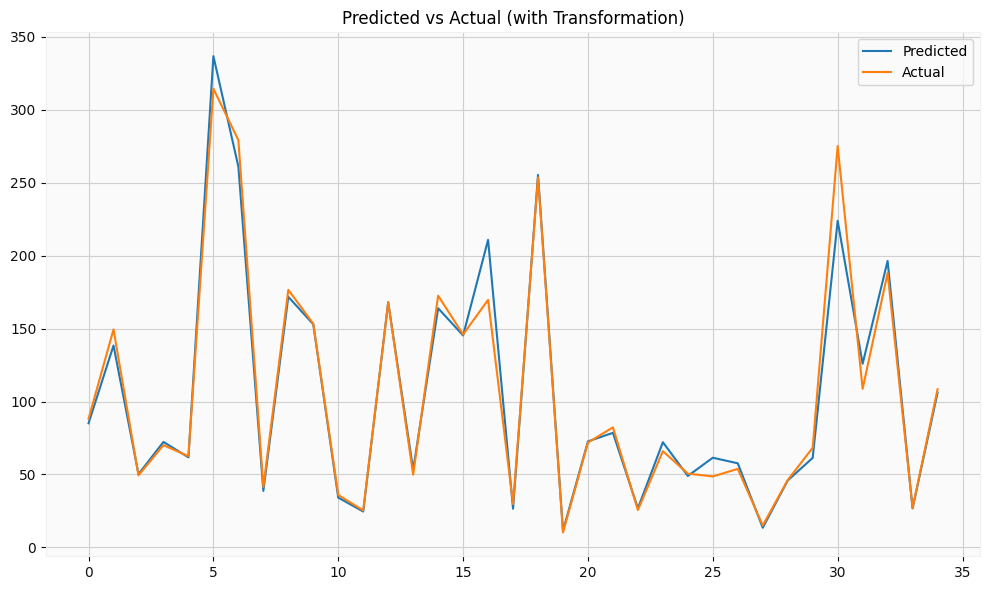

In [130]:
plt.figure(figsize=(10, 6))

# Plot with transformation
plt.plot(10 ** (y_test_pred_ridge))
plt.plot(np.array(10 ** (y_test)))
plt.legend(["Predicted", "Actual"])
plt.title("Predicted vs Actual (with Transformation)")

plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Residual Analysis')

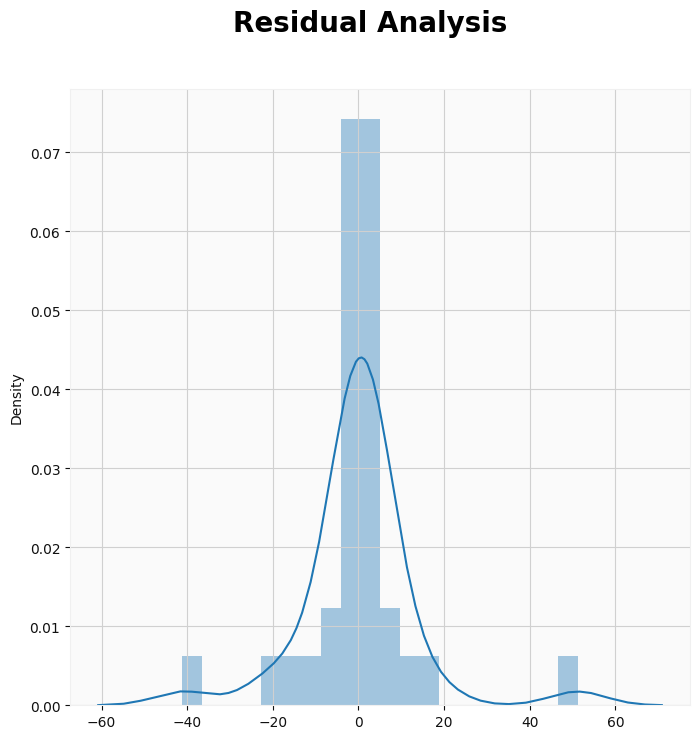

In [131]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_test_pred_ridge)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

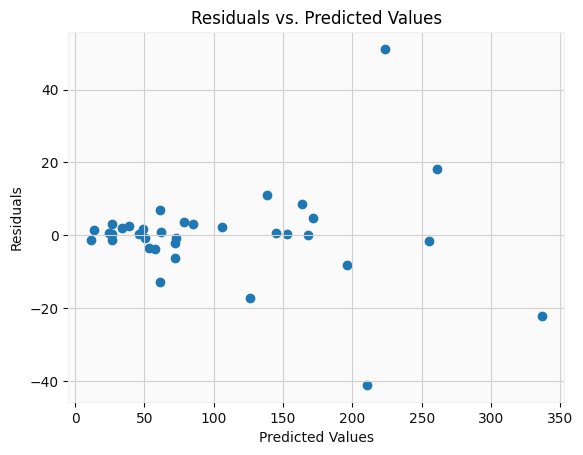

In [132]:
#Homoscadasticity
residuals = 10**(y_test)-10**(y_test_pred_ridge)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_test_pred_ridge),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [134]:
metrics['ridge_regressor'] = [train_MAE_ridge, train_MSE_ridge, train_RMSE_ridge, train_r2_ridge, train_adjusted_r2_ridge,MAE_ridge,MSE_ridge,RMSE_ridge,r2_ridge,adjusted_r2_ridge]


In [135]:
metrics

,Metric,reg_with_transformation,Lr_gs,ridge_regressor
0,Train Mean Absolute Error,7.979670,8.185811,7.822373
1,Train Mean squared Error,165.744572,222.498845,165.548558
2,Train Root Mean squared Error,12.874182,14.916395,12.866567
3,Train R2 score,0.984231,0.978832,0.984250
4,Train Adjusted R2 score,0.982578,0.976612,0.982599
5,Mean Absolute Error,7.629684,7.184358,7.051583
6,Mean squared Error,247.398399,128.386451,173.268187
7,Root Mean squared Error,15.728903,11.330775,13.163137
8,R2 score,0.962720,0.980653,0.973890
9,Adjusted R2 score,0.939641,0.968677,0.957727


In [136]:
# ML Model - 2 Implementation
rf = RandomForestRegressor()

# Fit the Algorithm
rf.fit(x_train,y_train)

# Predict on the model
y_pred_train_rf =rf.predict(x_train)
y_pred_test_rf =rf.predict(x_test)

In [137]:
# Metric Score for train set
train_MAE_rf = mean_absolute_error(10**(y_train),(10**y_pred_train_rf))
print(f"Mean Absolute Error : {train_MAE_rf}")


train_MSE_rf  = mean_squared_error(10**(y_train), 10**(y_pred_train_rf))
print("MSE :" , train_MSE_rf)

train_RMSE_rf = np.sqrt(train_MSE_rf)
print("RMSE :" ,train_RMSE_rf)

train_r2_rf = r2_score(10**(y_train), 10**(y_pred_train_rf))
print("R2 :" ,train_r2_rf)

train_adjusted_r2_rf=1-(1-r2_score(10**(y_train), 10**(y_pred_train_rf)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_rf)

print('\n')

# Metric Score for test set
MAE_rf = mean_absolute_error(10**(y_test),(10**y_pred_test_rf))
print(f"Mean Absolute Error : {MAE_rf}")

MSE_rf  = mean_squared_error(10**(y_test), 10**(y_pred_test_rf))
print("MSE :" , MSE_rf)

RMSE_rf = np.sqrt(MSE_rf)
print("RMSE :" ,RMSE_rf)

r2_rf = r2_score(10**(y_test), 10**(y_pred_test_rf))
print("R2 :" ,r2_rf)

adjusted_r2_rf=1-(1-r2_score(10**(y_test), 10**(y_pred_test_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_rf)

Mean Absolute Error : 3.9423609305341674
MSE : 42.22151972221543
RMSE : 6.497808840079511
R2 : 0.995983061051535
Adjusted R2: 0.9955619303553249


Mean Absolute Error : 9.71967334166288
MSE : 297.04650118030577
RMSE : 17.235037022887585
R2 : 0.9552381502260583
Adjusted R2: 0.9275284336993325


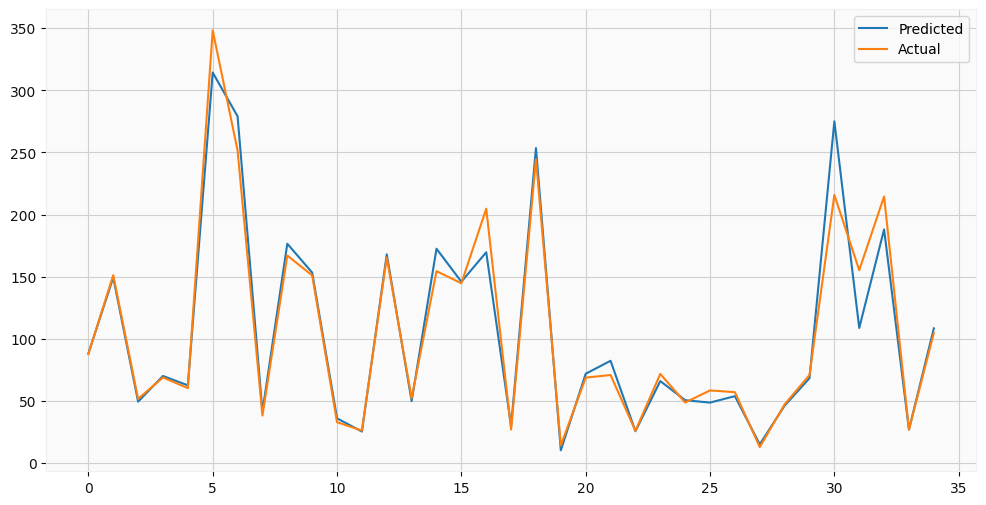

In [138]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_pred_test_rf)))
plt.legend(["Predicted","Actual"])
plt.show()

Cross-Validation & Hyperparameter Tuning

In [139]:

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [1,2,6,7,8,9,10,20,30,40],
    'min_samples_split':[10,20,30,40,50,100,150,200],
    'min_samples_leaf': [1,2,8,10,20,40,50]


}


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_grid_rf,verbose=2, cv=5, scoring='r2')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_train, y_train)

# Get the best estimator
best_model_rf_rs = random_search.best_estimator_




Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=8, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=   0.1s
[CV] END max_dept

In [140]:
best_model_rf_rs.feature_importances_

array([9.01067657e-01, 9.24815642e-02, 3.03026800e-03, 9.28453692e-04,
       2.50854531e-04, 9.20533049e-04, 4.01009154e-04, 1.11971363e-04,
       4.07006093e-05, 1.73653345e-04, 2.58855799e-04, 1.33551738e-04,
       2.00927912e-04])

In [141]:
print(best_model_rf_rs)

RandomForestRegressor(max_depth=20, min_samples_leaf=8, min_samples_split=10)


In [142]:
# Predict the model
y_pred_train_rf_rs= random_search.predict(x_train)
y_pred_test_rf_rs= random_search.predict(x_test)

In [143]:
random_search.score(x_train,y_train)

0.9814667824806836

In [144]:
# Metric Score for train set
train_MAE_rf_rs = mean_absolute_error(10**(y_train),(10**y_pred_train_rf_rs))
print(f"Mean Absolute Error : {train_MAE_rf_rs}")


train_MSE_rf_rs  = mean_squared_error(10**(y_train), 10**(y_pred_train_rf_rs))
print("MSE :" , train_MSE_rf_rs)

train_RMSE_rf_rs = np.sqrt(train_MSE_rf_rs)
print("RMSE :" ,train_RMSE_rf_rs)

train_r2_rf_rs = r2_score(10**(y_train), 10**(y_pred_train_rf_rs))
print("R2 :" ,train_r2_rf_rs)

train_adjusted_r2_rf_rs=1-(1-r2_score(10**(y_train), 10**(y_pred_train_rf_rs)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_rf_rs)

print('\n')

# Metric Score for test set
MAE_rf_rs = mean_absolute_error(10**(y_test),(10**y_pred_test_rf_rs))
print(f"Mean Absolute Error : {MAE_rf_rs}")

MSE_rf_rs  = mean_squared_error(10**(y_test), 10**(y_pred_test_rf_rs))
print("MSE :" , MSE_rf_rs)

RMSE_rf_rs = np.sqrt(MSE_rf_rs)
print("RMSE :" ,RMSE_rf_rs)

r2_rf_rs = r2_score(10**(y_test), 10**(y_pred_test_rf_rs))
print("R2 :" ,r2_rf_rs)

adjusted_r2_rf_rs=1-(1-r2_score(10**(y_test), 10**(y_pred_test_rf_rs)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_rf_rs)

Mean Absolute Error : 8.519490892731701
MSE : 186.2201377322713
RMSE : 13.646249951260284
R2 : 0.982283088596366
Adjusted R2: 0.9804256704653399


Mean Absolute Error : 10.996817478197759
MSE : 338.38939489331943
RMSE : 18.395363407481774
R2 : 0.9490082017491406
Adjusted R2: 0.9174418504509895


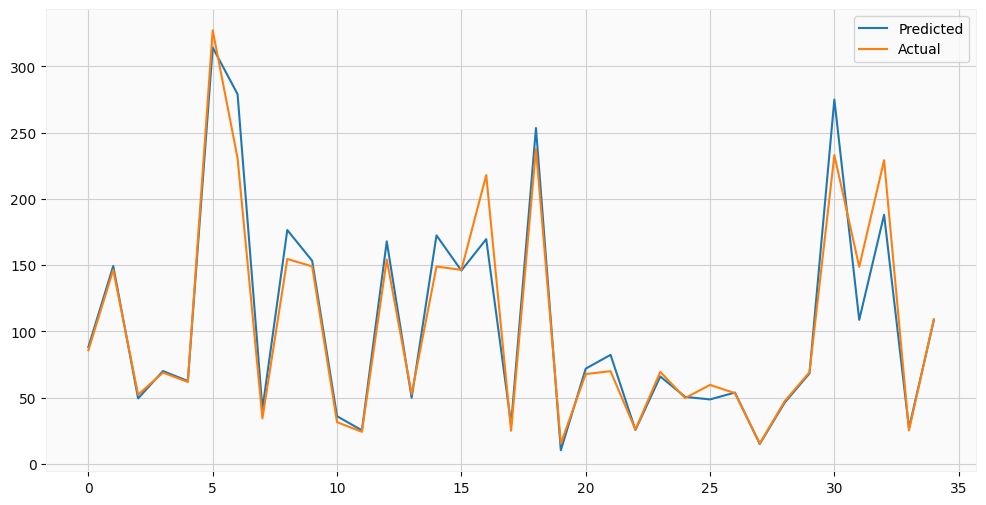

In [145]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_pred_test_rf_rs)))
plt.legend(["Predicted","Actual"])
plt.show()

In [146]:
metrics['random_search'] = [train_MAE_rf_rs, train_MSE_rf_rs, train_RMSE_rf_rs, train_r2_rf_rs, train_adjusted_r2_rf_rs,MAE_rf_rs,MSE_rf_rs,RMSE_rf_rs,r2_rf_rs,adjusted_r2_rf_rs]


In [147]:
metrics

,Metric,reg_with_transformation,Lr_gs,ridge_regressor,random_search
0,Train Mean Absolute Error,7.979670,8.185811,7.822373,8.519491
1,Train Mean squared Error,165.744572,222.498845,165.548558,186.220138
2,Train Root Mean squared Error,12.874182,14.916395,12.866567,13.646250
3,Train R2 score,0.984231,0.978832,0.984250,0.982283
4,Train Adjusted R2 score,0.982578,0.976612,0.982599,0.980426
5,Mean Absolute Error,7.629684,7.184358,7.051583,10.996817
6,Mean squared Error,247.398399,128.386451,173.268187,338.389395
7,Root Mean squared Error,15.728903,11.330775,13.163137,18.395363
8,R2 score,0.962720,0.980653,0.973890,0.949008
9,Adjusted R2 score,0.939641,0.968677,0.957727,0.917442


ML Model -3

In [148]:
# ML Model - 3 Implementation

xgboost = XGBRegressor(objective= 'reg:squarederror')

# Fit the Algorithm
xgboost.fit(x_train,y_train)

# Predict on the model
y_pred_train_xg =xgboost.predict(x_train)
y_pred_test_xg =xgboost.predict(x_test)


In [149]:
# Metric Score for train set
train_MAE_xg = mean_absolute_error(10**(y_train),(10**y_pred_train_xg))
print(f"Mean Absolute Error : {train_MAE_xg}")


train_MSE_xg  = mean_squared_error(10**(y_train), 10**(y_pred_train_xg))
print("MSE :" , train_MSE_xg)

train_RMSE_xg = np.sqrt(train_MSE_xg)
print("RMSE :" ,train_RMSE_xg)

train_r2_xg = r2_score(10**(y_train), 10**(y_pred_train_xg))
print("R2 :" ,train_r2_xg)

train_adjusted_r2_xg=1-(1-r2_score(10**(y_train), 10**(y_pred_train_xg)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_xg)

print('\n')

# Metric Score for test set
MAE_xg = mean_absolute_error(10**(y_test),(10**y_pred_test_xg))
print(f"Mean Absolute Error : {MAE_xg}")

MSE_xg  = mean_squared_error(10**(y_test), 10**(y_pred_test_xg))
print("MSE :" , MSE_xg)

RMSE_xg = np.sqrt(MSE_xg)
print("RMSE :" ,RMSE_xg)

r2_xg = r2_score(10**(y_test), 10**(y_pred_test_xg))
print("R2 :" ,r2_xg)

adjusted_r2_xg=1-(1-r2_score(10**(y_test), 10**(y_pred_test_xg)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_xg)

Mean Absolute Error : 0.1552073832525791
MSE : 0.07029434807287344
RMSE : 0.2651308131335802
R2 : 0.9999933122230917
Adjusted R2: 0.9999926110851901


Mean Absolute Error : 9.716396905081599
MSE : 226.63773169331026
RMSE : 15.05449207689553
R2 : 0.9658480269626032
Adjusted R2: 0.9447063293680242


Explain the ML Model used and it's performance using Evaluation metric
Score Chart.

In [150]:
# Visualizing evaluation Metric Score chart
#Converting into readable format
EM=['MAE','MSE','RMSE','r2','adjusted_r2']
train_xg=[train_MAE_xg,train_MSE_xg,train_RMSE_xg,train_r2_xg,train_adjusted_r2_xg]
test_xg=[MAE_xg,MSE_xg,RMSE_xg,r2_xg,adjusted_r2_xg]

#final dataframe of parameters
data_xg=pd.DataFrame({'Evalution Parameters': EM, 'Train':train_xg, 'Test':test_xg}).set_index('Evalution Parameters')
data_xg


,Train,Test
Evalution Parameters,,
MAE,0.155207,9.716397
MSE,0.070294,226.637732
RMSE,0.265131,15.054492
r2,0.999993,0.965848
adjusted_r2,0.999993,0.944706


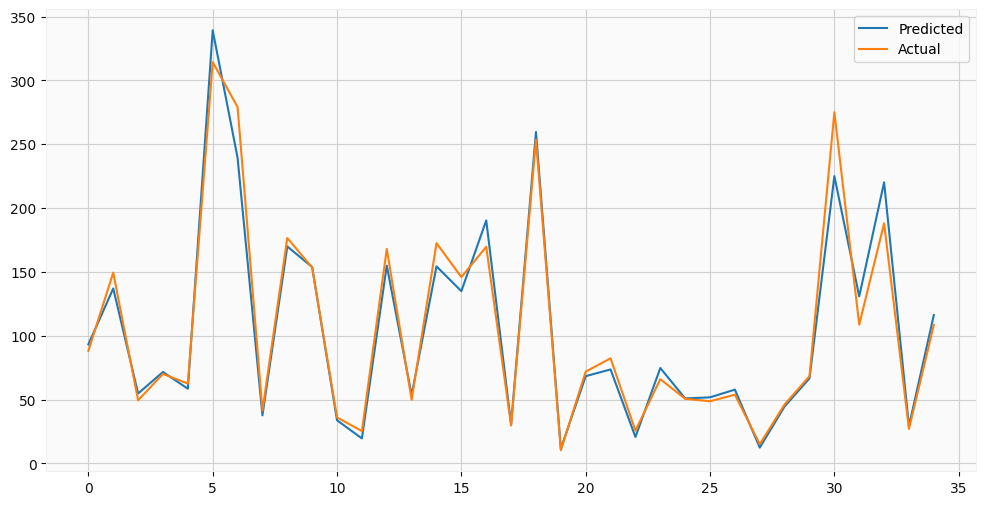

In [151]:
plt.figure(figsize=(12,6))
plt.plot((10**y_pred_test_xg))
plt.plot(np.array((10**y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


2. Cross-Validation & Hyperparameter Tuning

Hypothesis Testing on overall Perfomance

In [155]:
import numpy as np
from scipy.stats import f

# Obtain the predicted values from the XGBoost model
y_pred_hypo = xgb_gs.predict(x_test)

# Calculate the residual sum of squares (RSS)
RSS = np.sum((y_test - y_pred_hypo) ** 2)

# Calculate the total sum of squares (TSS)
TSS = np.sum((y_test - np.mean(y_test)) ** 2)

# Calculate the degrees of freedom
n = len(y_test)
k = x_test.shape[1]
df_model = k - 1
df_residual = n - k

# Calculate the F-statistic
F = ((TSS - RSS) / df_model) / (RSS / df_residual)

# Calculate the p-value
p_value = 1 - f.cdf(F, df_model, df_residual)

# Define the significance level (alpha)
alpha = 0.05

# Perform the hypothesis test
if p_value < alpha:
    print("Reject the null hypothesis. The model has significant predictive power.")
else:
    print("Fail to reject the null hypothesis. The model does not have significant predictive power.")


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

NameError: name 'y_pred_test_xgb_gs' is not defined

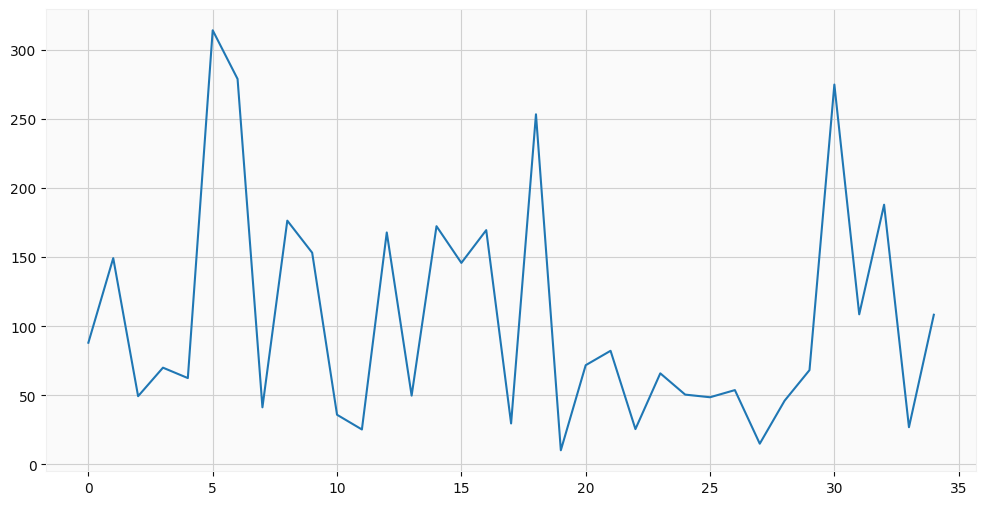

In [156]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_pred_test_xgb_gs)))
plt.legend(["Predicted","Actual"])
plt.show()

In [157]:
metrics

,Metric,reg_with_transformation,Lr_gs,ridge_regressor,random_search
0,Train Mean Absolute Error,7.979670,8.185811,7.822373,8.519491
1,Train Mean squared Error,165.744572,222.498845,165.548558,186.220138
2,Train Root Mean squared Error,12.874182,14.916395,12.866567,13.646250
3,Train R2 score,0.984231,0.978832,0.984250,0.982283
4,Train Adjusted R2 score,0.982578,0.976612,0.982599,0.980426
5,Mean Absolute Error,7.629684,7.184358,7.051583,10.996817
6,Mean squared Error,247.398399,128.386451,173.268187,338.389395
7,Root Mean squared Error,15.728903,11.330775,13.163137,18.395363
8,R2 score,0.962720,0.980653,0.973890,0.949008
9,Adjusted R2 score,0.939641,0.968677,0.957727,0.917442


In [158]:
print(best_model_xgb_gs.feature_importances_)


NameError: name 'best_model_xgb_gs' is not defined

In [159]:
import numpy as np
from scipy.stats import f

# Obtain the predicted values from the XGBoost model
y_pred_hypo = xgb_gs.predict(x_test)

# Calculate the residual sum of squares (RSS)
RSS = np.sum((y_test - y_pred_hypo) ** 2)

# Calculate the total sum of squares (TSS)
TSS = np.sum((y_test - np.mean(y_test)) ** 2)

# Calculate the degrees of freedom
n = len(y_test)
k = x_test.shape[1]
df_model = k - 1
df_residual = n - k

# Calculate the F-statistic
F = ((TSS - RSS) / df_model) / (RSS / df_residual)

# Calculate the p-value
p_value = 1 - f.cdf(F, df_model, df_residual)

# Define the significance level (alpha)
alpha = 0.05

# Perform the hypothesis test
if p_value < alpha:
    print("Reject the null hypothesis. The model has significant predictive power.")
else:
    print("Fail to reject the null hypothesis. The model does not have significant predictive power.")


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [160]:
pip install shap


In [165]:
import shap

# Generate SHAP values for the entire training dataset
# shap_values = explainer(x_test)

# # Select a specific record for explanation (e.g., the first record in x_test)


# # Explain the prediction for the selected record
# shap.initjs()
# shap.force_plot(shap_values[0], feature_names=x_independ.columns)

8. Future Work (Optional)
1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

[ ]
# Save the File

2. Again Load the saved model file and try to predict unseen data for a sanity check.






Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!
Conclusion
The main goal of the project is to create a machine learning model which can predict the closing price of Yes Bank stock for that month, keeping in mind of the fraud case happened in 2018.

I have developed 3 models Ridge_Regression, Random forest and XGBoost Regressor. XGBRegressor model shows promising result with R2 score of 0.97 both on train and test dataset, therefore it can be used to solve this problem. It also considering all newlt added features and taking care of multicollinearity.

Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.

We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.

I considered to take mean of Open, High and Low faetures.Additional features were engineered by taking lags to capture the temporal trends and patterns, which can also can take care of fraud case by studying the pattern.

The important feautures which plays a crucial role in deciding closing price are {'OHL', 'lag1', 'lag2', 'lag12','lag9 ', 'lag4', 'lag6', 'lag11'}

The dataset has only monthly related price, a daily level price would be more accurate as model can analyze important patterns like week opening price and weekend price. Volume of the data if provided can also be useful in making prediction. A stock prediction involved many aspects like holidays, political decisions, events, un precedented disasters, human decisions. This can be better predicted by having all these features and using time series models like ARIMA and LSTM can ve predicted more accurately.

Given the dataset and features, Our model is performing well on all data-points. With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.

Hurrah! You have successfully completed your Machine Learning Capstone Project !!!
